In [1]:
import sys
import importlib
import os
import matplotlib.pyplot as plt
import pandas as pd
# make the module available from the src directory
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
from src.dataLoaders.PatientDataLoader import PatientDataProcessor
importlib.reload(sys.modules['src.dataLoaders.PatientDataLoader'])

<module 'src.dataLoaders.PatientDataLoader' from '/Users/mraabo/computer_science/year_3/bachelor/XAI-in-Medical-Image-Analysis/src/dataLoaders/PatientDataLoader.py'>

In [3]:
meta_folder = 'OAIData21/'
data_path = '../datasets/meta_data/' + meta_folder
visit = 0

processor = PatientDataProcessor(base_path=data_path)
processor.load_all_visits()
data = processor.get_all_clinical_data()
# processor.get_data()["V11WOMKPL"].unique()


Loading kMRI data for visit V00
object
Length of the dataframe: 329
Length of the dataframe: 329
Loading kMRI data for visit V01
object
Length of the dataframe: 227
Length of the dataframe: 227
Loading kMRI data for visit V02
No file found at:  ../datasets/meta_data/OAIData21//kMRI_QCart_Eckstein02.txt skipping.
Length of the dataframe: 0
Loading kMRI data for visit V03
object
Length of the dataframe: 189
Length of the dataframe: 189
Loading kMRI data for visit V04
No file found at:  ../datasets/meta_data/OAIData21//kMRI_QCart_Eckstein04.txt skipping.
Length of the dataframe: 0
Loading kMRI data for visit V05
object
Length of the dataframe: 20
Length of the dataframe: 20
Loading kMRI data for visit V06
object
Length of the dataframe: 45
Length of the dataframe: 45
Loading kMRI data for visit V07
No file found at:  ../datasets/meta_data/OAIData21//kMRI_QCart_Eckstein07.txt skipping.
Length of the dataframe: 0
Loading kMRI data for visit V08
No file found at:  ../datasets/meta_data/OAIDa

/Users/mraabo/computer_science/year_3/bachelor/XAI-in-Medical-Image-Analysis/src/dataLoaders/PatientDataLoader.py:172: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  self.enroll_df = df_enroll[['P02SEX']].replace(
/Users/mraabo/computer_science/year_3/bachelor/XAI-in-Medical-Image-Analysis/src/dataLoaders/PatientDataLoader.py:311: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method

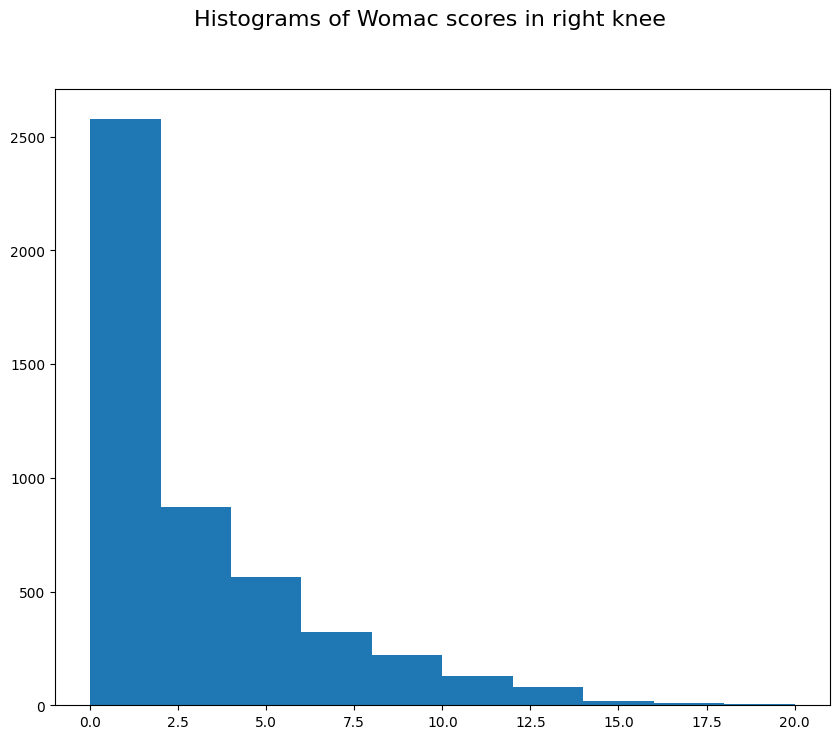

In [4]:
womac_right_knee = data['V00WOMKPR']
womac_right_knee.hist(bins=10, figsize=(10, 8), grid=False)
plt.suptitle('Histograms of Womac scores in right knee', fontsize=16)
plt.show()

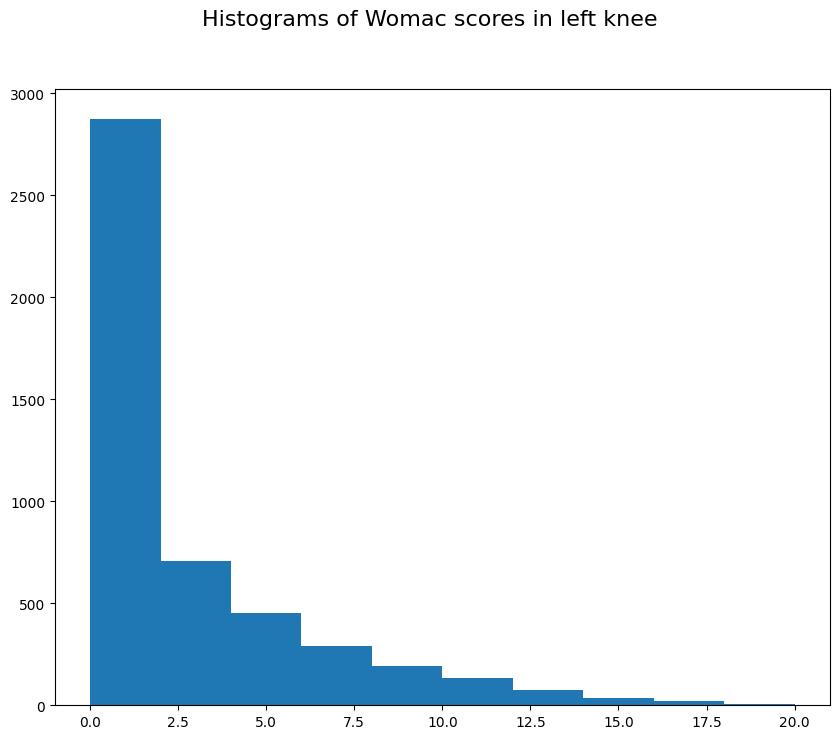

In [5]:
womac_left_knee = data['V00WOMKPL']
womac_left_knee.hist(bins=10, figsize=(10, 8), grid=False)
plt.suptitle('Histograms of Womac scores in left knee', fontsize=16)
plt.show()

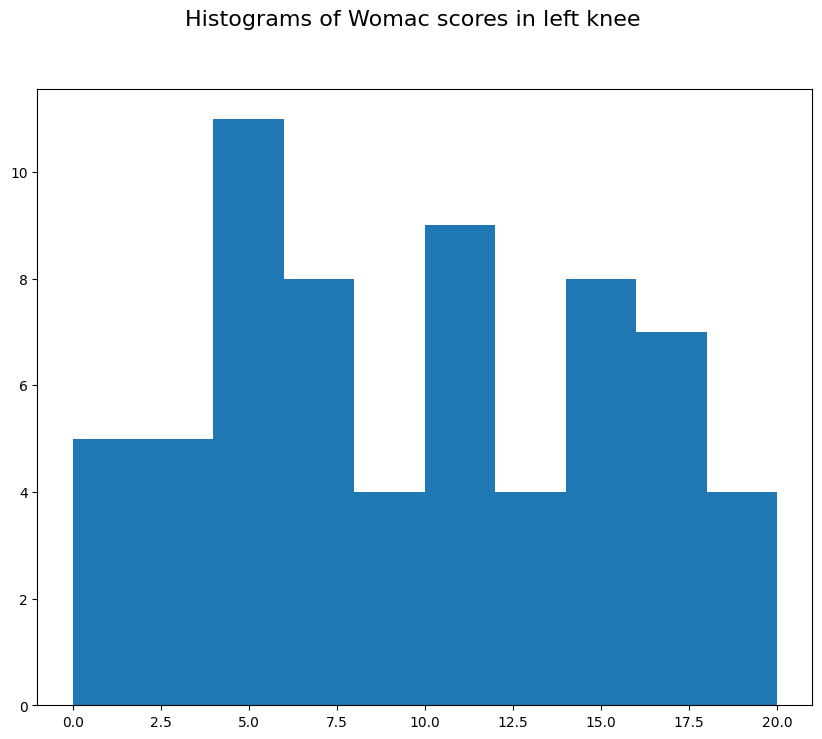

In [18]:
trunc_data = data[data['V00WOMKPR'] >= 13]
womac_left_knee = trunc_data['V00WOMKPL']
womac_left_knee.hist(bins=10, figsize=(10, 8), grid=False)
plt.suptitle('Histograms of Womac scores in left knee', fontsize=16)
plt.show()

In [7]:
# def sample_uniformly(df, feature, n_samples):
#     """
#     Sample n_samples rows uniformly distributed according to the specified feature.

#     Parameters:
#     - df: pandas DataFrame
#     - feature: str, the name of the feature to sample uniformly
#     - n_samples: int, total number of samples desired

#     Returns:
#     - pandas DataFrame containing the sampled rows
#     """
#     unique_values = df[feature].unique()
#     n_unique_values = len(unique_values)

#     # Calculate number of samples per unique value
#     samples_per_value = max(1, n_samples // n_unique_values)

#     sampled_df_list = []
#     for value in unique_values:
#         value_group = df[df[feature] == value]
#         sampled_value_group = value_group.sample(n=min(samples_per_value, len(value_group)), replace=False)
#         sampled_df_list.append(sampled_value_group)

#     sampled_df = pd.concat(sampled_df_list).sample(n=n_samples, replace=False).reset_index(drop=True)
#     return sampled_df


In [19]:
from sklearn.model_selection import StratifiedShuffleSplit

def sample_uniformly(df, feature, n_samples):
    """
    Sample n_samples rows uniformly distributed according to the specified feature.

    Parameters:
    - df: pandas DataFrame
    - feature: str, the name of the feature to sample uniformly
    - n_samples: int, total number of samples desired

    Returns:
    - pandas DataFrame containing the sampled rows
    """
    # Create a StratifiedShuffleSplit object
    sss = StratifiedShuffleSplit(n_splits=1, test_size=n_samples, random_state=0)

    # Get the indices for the stratified sample
    for _, index in sss.split(df, df[feature]):
        sampled_df = df.iloc[index]

    return sampled_df

In [20]:

womac_right_knee_uni = sample_uniformly(data_trunc, 'V00WOMKPR', 1)
womac_right_knee_uni['V00WOMKPR'].hist(bins=10, figsize=(10, 8), grid=False)
plt.suptitle('Histograms of Womac scores in right knee', fontsize=16)
plt.show()

ValueError: The least populated class in y has only 1 member, which is too few. The minimum number of groups for any class cannot be less than 2.

In [ ]:
data.shape

(4796, 170)